# procedure - F simulacion del experimento real


We simulate the exit considering that the SLM is not ideal but is considering the performance of a real SLM.

## Load

In [1]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

In [2]:
from slm import np, sp, plt, um, mm, degrees

from slm.LCD_jones_matrices import LCD_jones_matrices, get_fields_gl, get_LUT_amplitude, get_LUT_phases
from slm.LCD_models import LCD_kopin

number of processors: 8


In [3]:
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw2D

number of processors: 8


In [4]:
LCD_model=LCD_kopin

In [5]:
LCD_experiment = LCD_jones_matrices(LCD_model)
LCD_jones = LCD_experiment.DC_to_pypol()

## Get _ mask

In [6]:
data=np.load('best_amplitude_angles_kopin.npz')
angles_amplitude=data['angles']
print(angles_amplitude/degrees)

[127.02439883  57.92425749 147.96711836  37.25893434]


In [7]:
data=np.load("LUT_amplitudes.npz")
amplitudes = data['amplitudes']
gl = data['gl']

In [8]:
x=np.linspace(-100,100,128)
y=np.linspace(-100,100,128)
wavelength=0.6328*um

In [21]:
t_mask=Scalar_mask_XY(x,y,wavelength)
t_mask.gray_scale(255,0,1)
t_shape=t_mask.u.shape
t_length=t_shape[0]*t_shape[1]

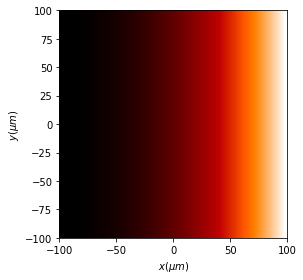

In [22]:
t_mask.draw();

In [23]:
LUT_amplitudes=get_LUT_amplitude(amplitudes, gl,t_mask.u)
SLM_jones=LCD_jones[LUT_amplitudes]

## Polarization elements

In [24]:
v0=[1/np.sqrt(2),-1j/np.sqrt(2)]

source = Jones_vector()
source.from_components(v0, length=t_length, shape=t_shape);

In [28]:
pol1 = Jones_matrix('m1')
pol1.diattenuator_linear(p1=1, p2=0, azimuth=0* degrees, length=t_length, shape_like=t_mask.u)

pol2 = Jones_matrix('m2')
pol2.retarder_linear(R= 90 * degrees, azimuth=0 * degrees, length=t_length, shape_like=t_mask.u)

pol3 = Jones_matrix('m3')
pol3.retarder_linear(R= 90 * degrees, azimuth=0 * degrees, length=t_length, shape_like=t_mask.u)

pol4 = Jones_matrix('m4')
pol4.diattenuator_linear(p1=1, p2=0, azimuth=0, length=t_length, shape_like=t_mask.u)

polarizers=(pol1, pol2, pol3, pol4)

In [29]:
u_xy_z0=pol4*pol3*SLM_jones*pol2*pol1*source

The intensity of m4 * m3 * SLM_picked * m2 * m1 * E is (a.u.):
The mean value is 0.2376986508929406 +- 0.1571882051596163


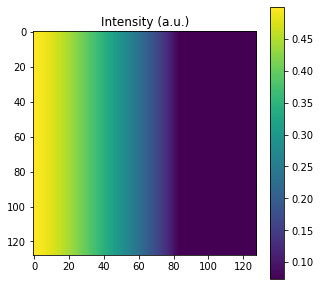

In [30]:
u_xy_z0.parameters.intensity(draw=True);

The global phase of m4 * m3 * SLM_picked * m2 * m1 * E is (deg.):
The mean value is 342.5349155535316 +- 2.9741001923702317


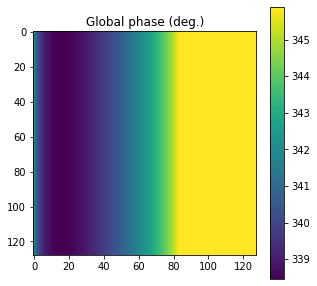

In [31]:
u_xy_z0.parameters.global_phase(draw=True);

In [32]:
u_xy_z0[0,0]

m4 * m3 * SLM_picked * m2 * m1 * E_picked = 
[+0.672-0.218j ]   
[+0.000+0.000j ]   

The elctric field components of m4 * m3 * SLM_picked * m2 * m1 * E are (V/m):
The mean value of param Ex (V/m) is (0.43379502715952845-0.14538928130220358j) +- 0.16847101289846045
The mean value of param Ey (V/m) is 0j +- 0.0


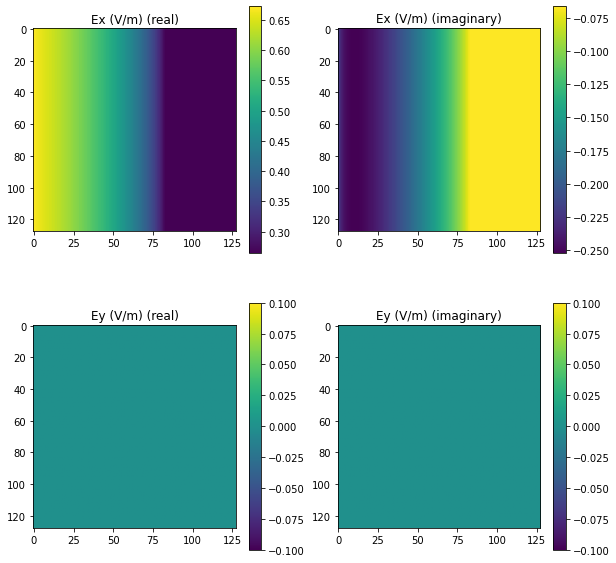

In [33]:
Ex,Ey=u_xy_z0.parameters.components(draw=True, verbose=False)